# EDA Economy Indicators (PostgreSQL)

In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


with open('credentials.json') as f:
    creds = json.load(f)

engine = create_engine(
    f"postgresql://{creds['user']}:{creds['password']}@{creds['host']}:{creds['port']}/{creds['database']}"
)

df = pd.read_sql("SELECT * FROM economy_raw", engine)

df.columns = df.columns.str.strip()

## Estructura y tipos de datos

In [6]:
print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

Dimensiones: (10512, 26)

Tipos de datos:
CountryID                                                           int64
Country                                                            object
Year                                                                int64
AMA exchange rate                                                 float64
IMF based exchange rate                                           float64
Population                                                          int64
Currency                                                           object
Per capita GNI                                                      int64
Agriculture, hunting, forestry, fishing (ISIC A-B)                float64
Changes in inventories                                            float64
Construction (ISIC F)                                             float64
Exports of goods and services                                     float64
Final consumption expenditure                                     floa

## Valores nulos por columna

In [11]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Changes in inventories                                            1841
Agriculture, hunting, forestry, fishing (ISIC A-B)                 121
General government final consumption expenditure                    52
Gross capital formation                                             52
Gross fixed capital formation (including Acquisitions less dis      52
Household consumption expenditure (including Non-profit instit      52
Transport, storage and communication (ISIC I)                       49
Wholesale, retail trade, restaurants and hotels (ISIC G-H)          49
Manufacturing (ISIC D)                                              43
Imports of goods and services                                       42
Exports of goods and services                                       21
dtype: int64

## Estadísticas descriptivas

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CountryID,10512.0,NaN,NaN,NaN,431.116629,251.16909,4.0,212.0,430.0,643.0,894.0
Country,10512,220,Afghanistan,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,10512.0,NaN,NaN,NaN,1996.262747,14.900361,1970.0,1984.0,1997.0,2009.0,2021.0
AMA exchange rate,10512.0,NaN,NaN,NaN,357.395851,2291.1278,0.0,1.0,2.812895,51.343163,111636.6283
IMF based exchange rate,10512.0,NaN,NaN,NaN,341.984639,1941.857487,0.0,1.0,2.761315,48.066844,42000.0
Population,10512.0,NaN,NaN,NaN,28515225.809741,114129598.544995,4359.0,633061.5,5051556.0,16788618.5,1425893465.0
Currency,10512,153,Euro,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Per capita GNI,10512.0,NaN,NaN,NaN,8965.564593,17070.205895,34.0,730.0,2316.5,8965.75,234317.0
"Agriculture, hunting, forestry, fishing (ISIC A-B)",10391.0,NaN,NaN,NaN,7793212164.361178,40343487480.507347,28139.0,130452157.0,931367444.0,4023325990.5,1350000000000.0
Changes in inventories,8671.0,NaN,NaN,NaN,1626543202.949372,8932352980.366264,-151000000000.0,467354.5,68296349.0,691075032.0,211000000000.0


## Distribución del GDP y GNI

In [20]:
print(df.columns.tolist())

['CountryID', 'Country', 'Year', 'AMA exchange rate', 'IMF based exchange rate', 'Population', 'Currency', 'Per capita GNI', 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Changes in inventories', 'Construction (ISIC F)', 'Exports of goods and services', 'Final consumption expenditure', 'General government final consumption expenditure', 'Gross capital formation', 'Gross fixed capital formation (including Acquisitions less dis', 'Household consumption expenditure (including Non-profit instit', 'Imports of goods and services', 'Manufacturing (ISIC D)', 'Mining, Manufacturing, Utilities (ISIC C-E)', 'Other Activities (ISIC J-P)', 'Total Value Added', 'Transport, storage and communication (ISIC I)', 'Wholesale, retail trade, restaurants and hotels (ISIC G-H)', 'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)']


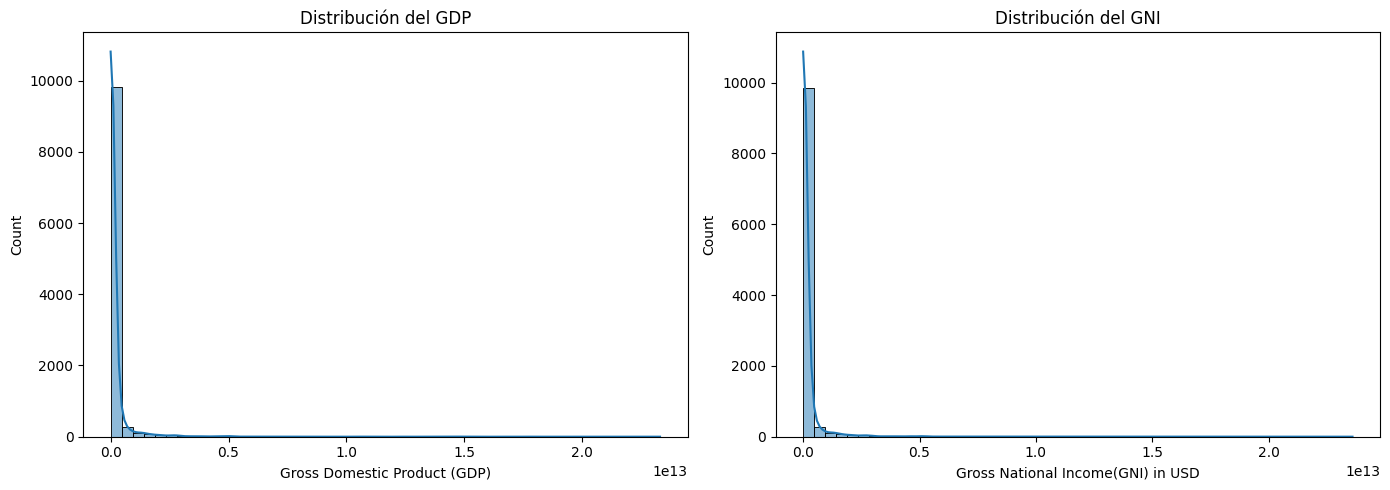

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Gross Domestic Product (GDP)'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución del GDP")
sns.histplot(df['Gross National Income(GNI) in USD'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribución del GNI")
plt.tight_layout()
plt.show()

## Mapa de calor de correlación

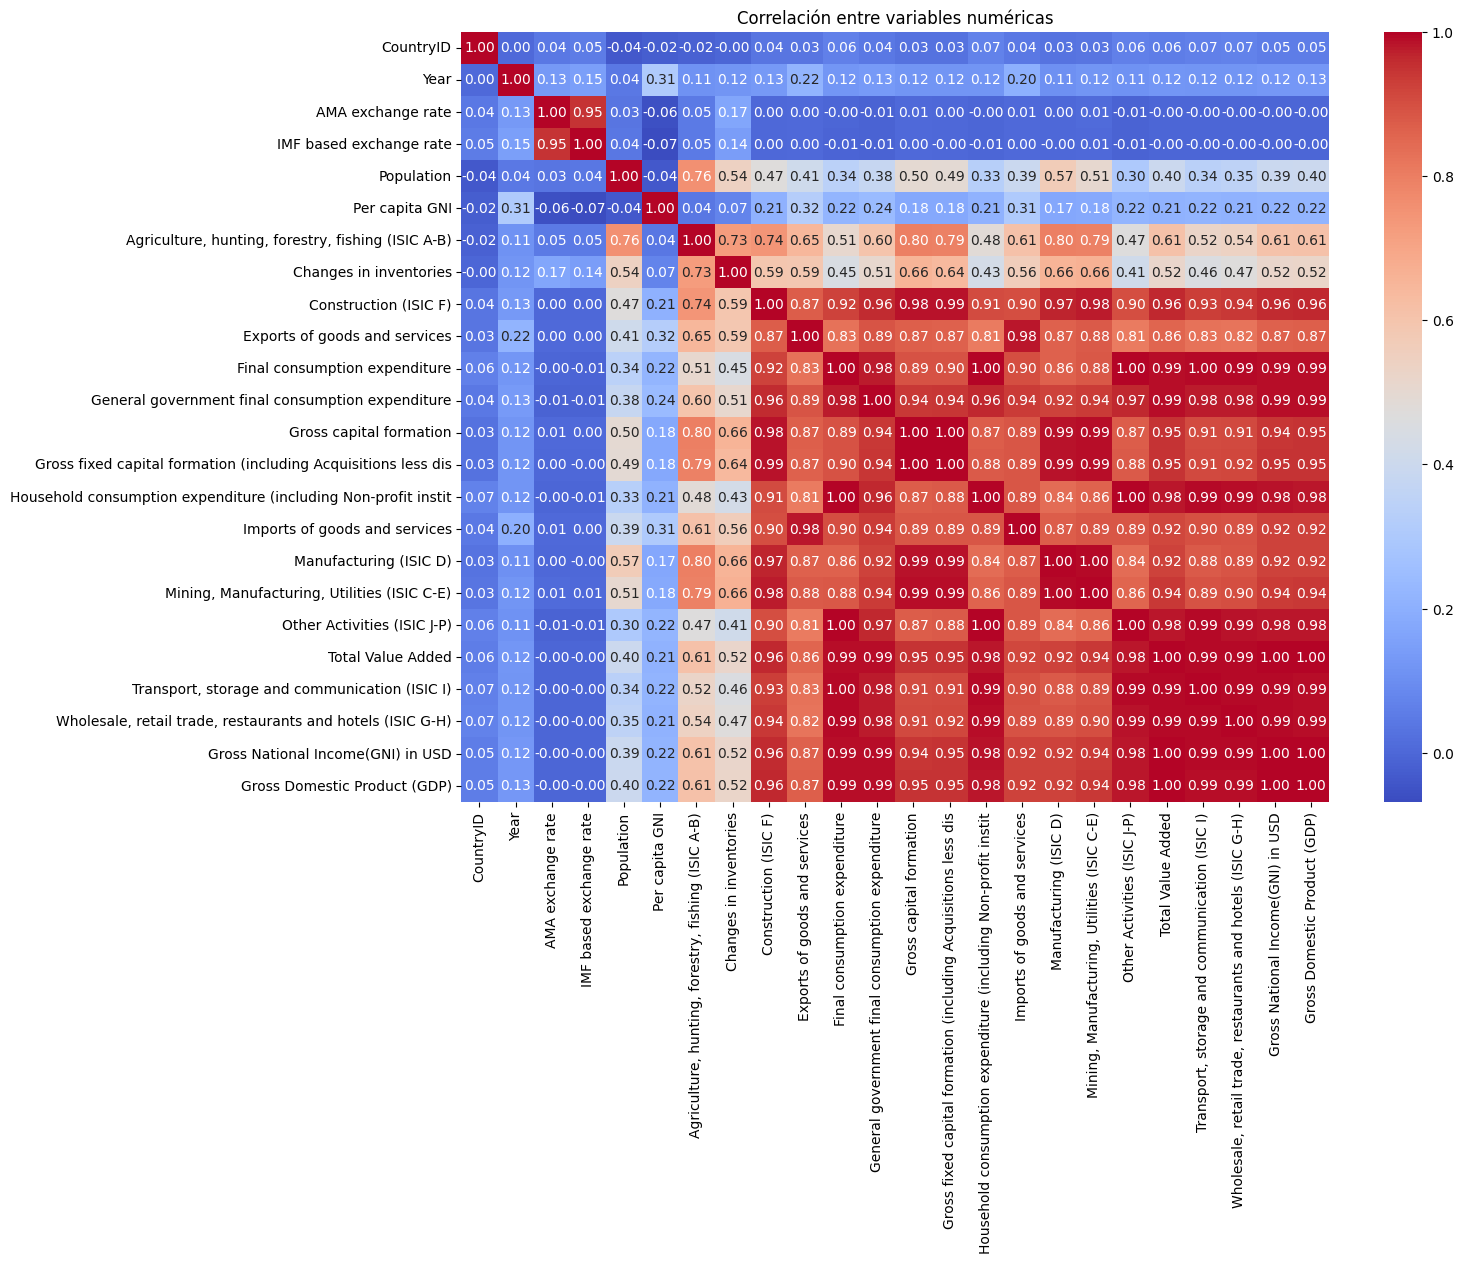

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables numéricas")
plt.show()

## Evolución del GDP en el tiempo (algunos países)

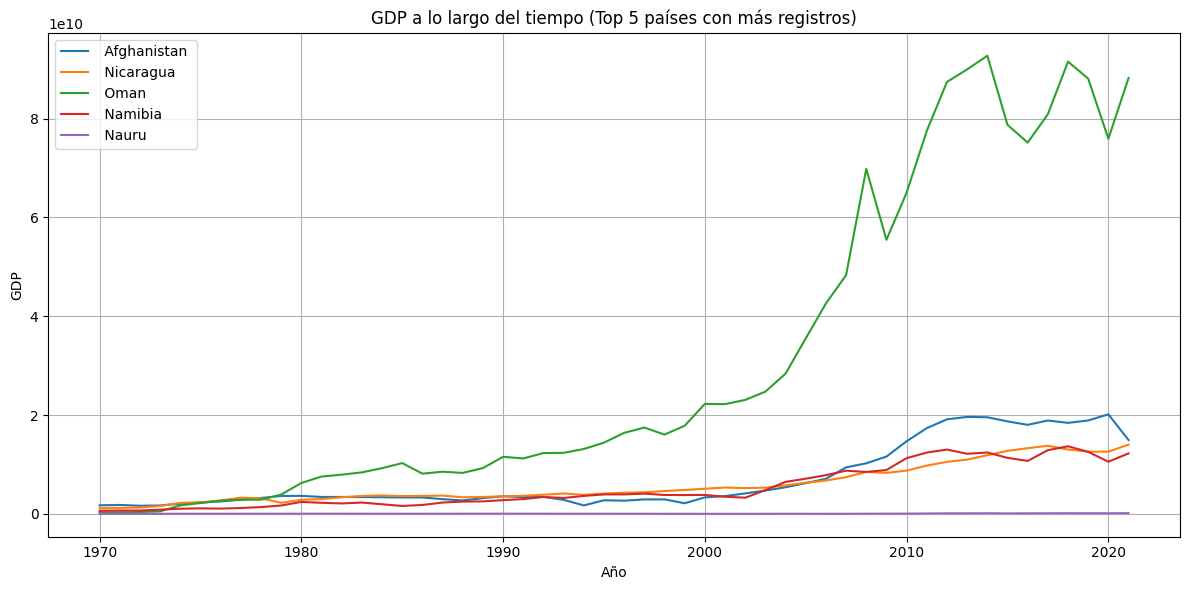

In [8]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Gross Domestic Product (GDP)'] = pd.to_numeric(df['Gross Domestic Product (GDP)'], errors='coerce')

top_countries = df['Country'].value_counts().nlargest(5).index.tolist()

df_top = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
for country in top_countries:
    subset = df_top[df_top['Country'] == country]
    subset = subset.sort_values('Year')
    plt.plot(subset['Year'], subset['Gross Domestic Product (GDP)'], label=country)

plt.legend()
plt.title("GDP a lo largo del tiempo (Top 5 países con más registros)")
plt.xlabel("Año")
plt.ylabel("GDP")
plt.grid(True)
plt.tight_layout()
plt.show()
